# Lab 2: More ggplot and dplyr

`YCH` stands for *Your Code Here* Please write your own code for only the places where you see `YCH`.

In [2]:
library(tidyverse)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# randomly sampling a subset from dataset
set.seed(108)
dm = diamonds %>% sample_n(1000)
names(dm)
summary(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 29   D:109   VS2    :252   Min.   :56.30  
 1st Qu.:0.4000   Good     : 96   E:189   SI1    :250   1st Qu.:61.00  
 Median :0.7000   Very Good:213   F:171   SI2    :153   Median :61.80  
 Mean   :0.7968   Premium  :256   G:216   VS1    :146   Mean   :61.73  
 3rd Qu.:1.0400   Ideal    :406   H:143   VVS2   : 98   3rd Qu.:62.50  
 Max.   :3.2200                   I:116   VVS1   : 60   Max.   :67.30  
                                  J: 56   (Other): 41                  
     table           price               x               y       
 Min.   :44.00   Min.   :  334.0   Min.   :3.850   Min.   :3.91  
 1st Qu.:56.00   1st Qu.:  971.8   1st Qu.:4.728   1st Qu.:4.72  
 Median :57.00   Median : 2398.5   Median :5.715   Median :5.72  
 Mean   :57.44   Mean   : 3941.8   Mean   :5.729   Mean   :5.73  
 3rd Qu.:59.00   3rd Qu.: 5493.0   3rd Qu.:6.522   3rd Qu.:6.51  
 Max.   :67.00   Max.   :187

# ggplot

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph1.png)

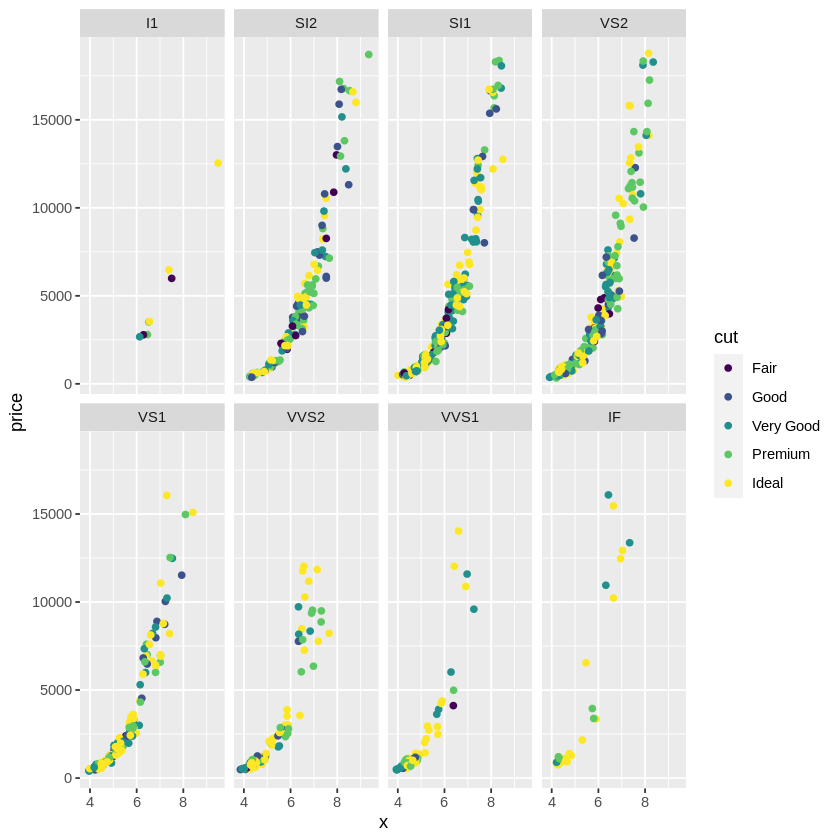

In [4]:
p1 = ggplot(dm) + 
    geom_point(aes(x, price, color = cut)) + 
    facet_wrap(vars(clarity), ncol=4)
print(p1)

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in trends of the data that we have.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



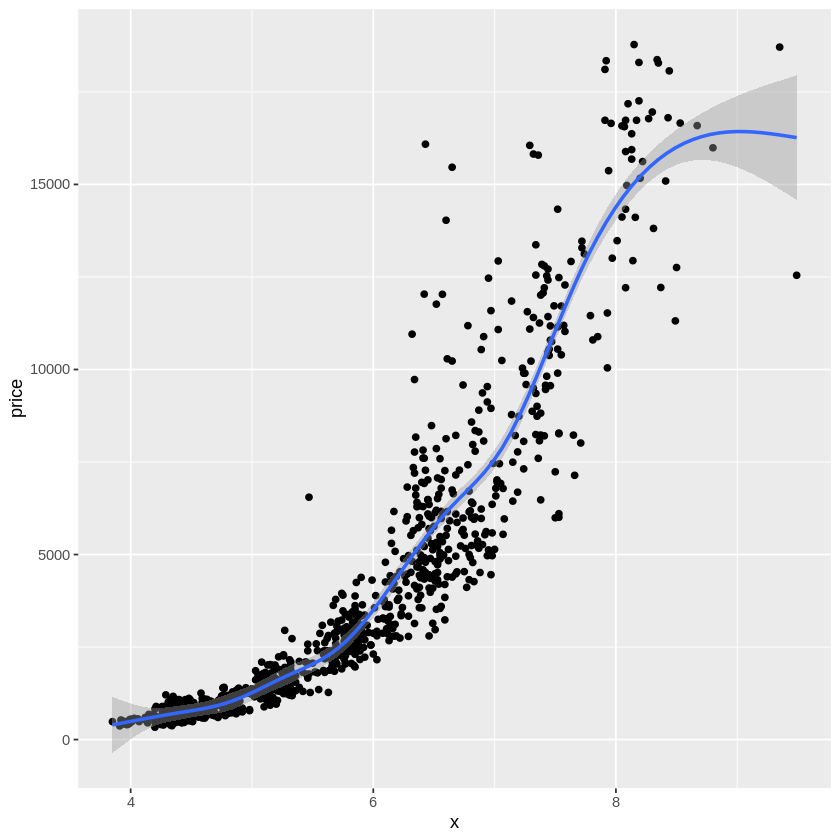

In [5]:
p2 = ggplot(dm) +
    geom_point(aes(x, price)) +
    geom_smooth(aes(x, price))
print(p2)

### Exercise 1
In the above fit, use locally weighted scatterplot smoother instead general additive model (loess). (see documentation)

`geom_smooth()` using formula 'y ~ x'



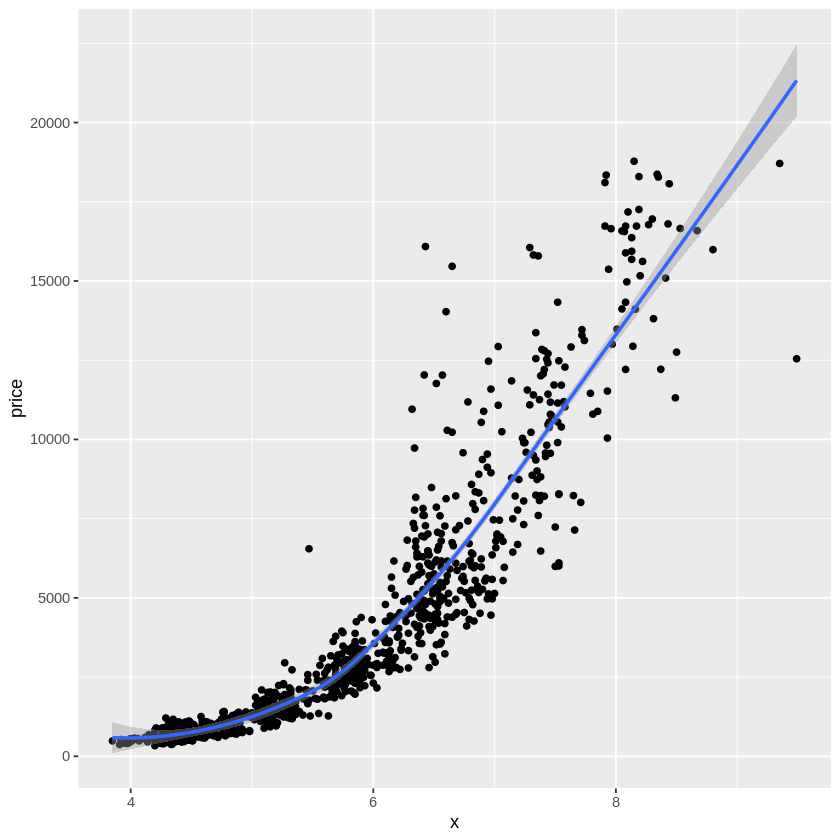

In [6]:
p3 = ggplot(dm) + 
    geom_point(aes(x, price)) + 
    geom_smooth(aes(x, price), method = "loess")
p3

### Exercise 2.1 
Fit a linear line

`geom_smooth()` using formula 'y ~ x'



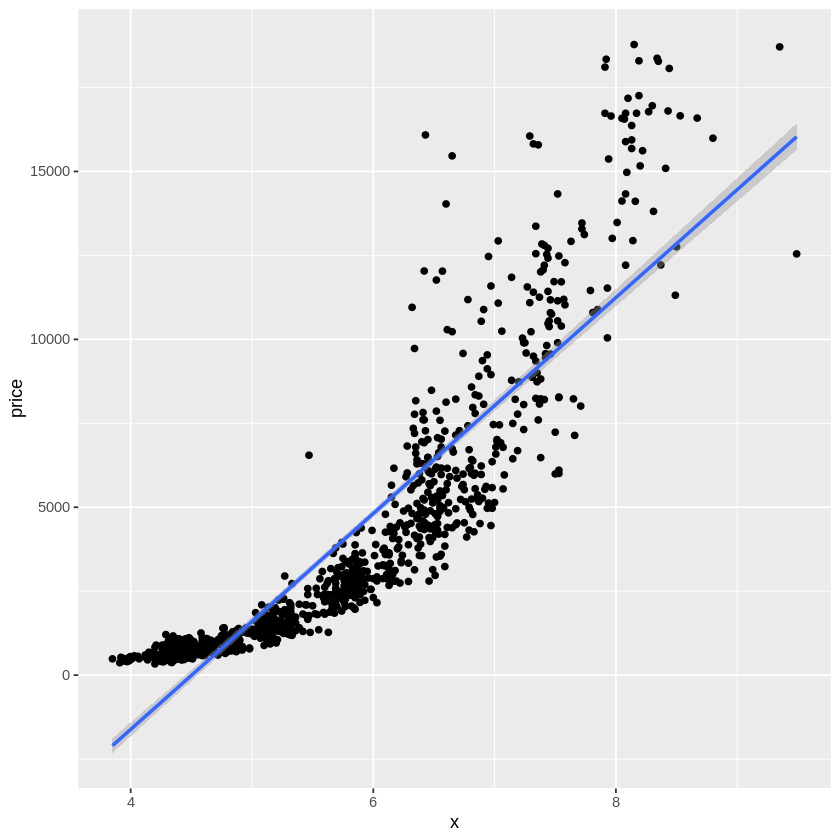

In [7]:
p4 = ggplot(dm) + 
    geom_point(aes(x, price)) + 
    geom_smooth(aes(x, price), method = "lm")
p4

### Exercise 2.2 (You do not need to do anything if your previous code is correct)
Fit a linear line in log scale

`geom_smooth()` using formula 'y ~ x'



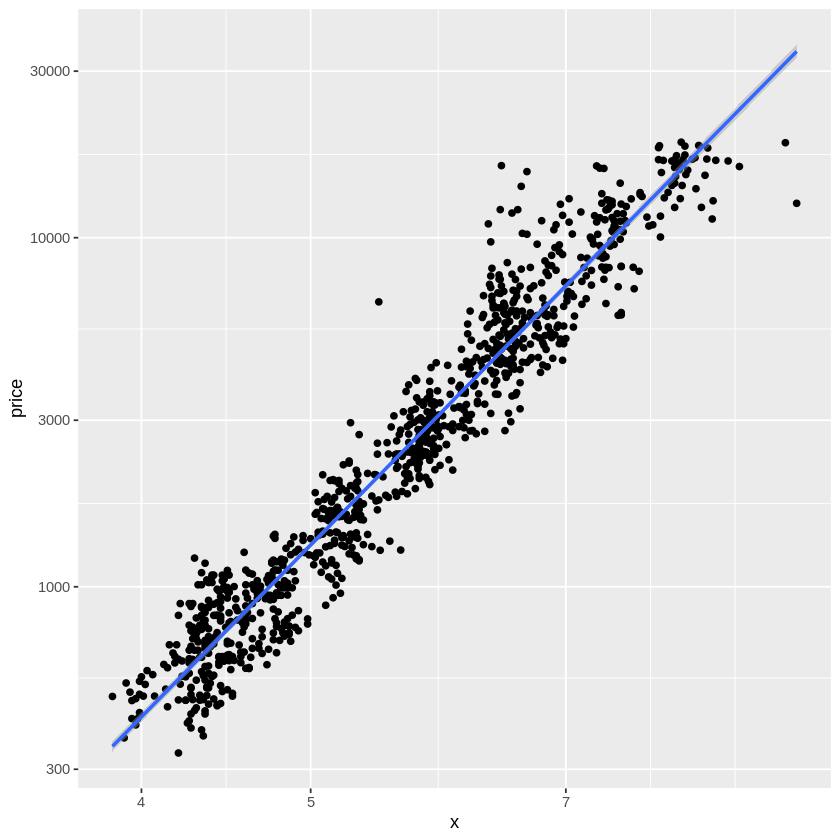

In [8]:
p4 + scale_x_continuous(trans='log10') + 
     scale_y_continuous(trans='log10')

### Why would log-log plot make sense?
* log-log plot describes the relationship $Price = c \cdot Carat^k$ for some constant $c, k > 0$. You could imagine that going from 0.1 carat to 0.2 carat may not increase much value, but increasing 1.9 carats to 2.0 carats would result in a significant increase in price. Let's look at the following relationship
$$ Price = c \cdot Carat^k \Rightarrow \log Price = \log c + k \log x$$
* You can see that once we transform both variables with log, we have a linear relationship between $\log Price$ and $\log Carat$.
* Can we find a transformation for all non-linear functions that turns it to a linear function? 

### Exercise 2.3
Make separate linear lines for each category of the clarity variable 

`geom_smooth()` using formula 'y ~ x'



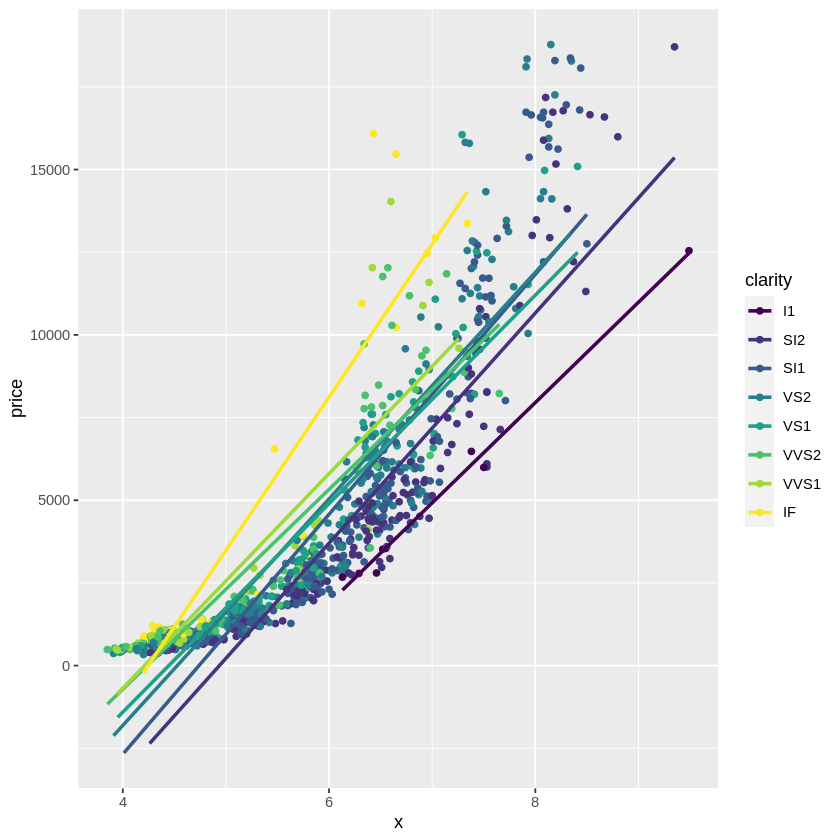

In [9]:
p4 = ggplot(dm) + 
    geom_point(aes(x = x, y = price, color = clarity)) + 
    geom_smooth(aes(x, price, color = clarity), method = "lm", se = F)
p4

### Exercise 3
How to reduce the code duplication above? "(x=x, y=price)" is in both lines. 

`geom_smooth()` using formula 'y ~ x'



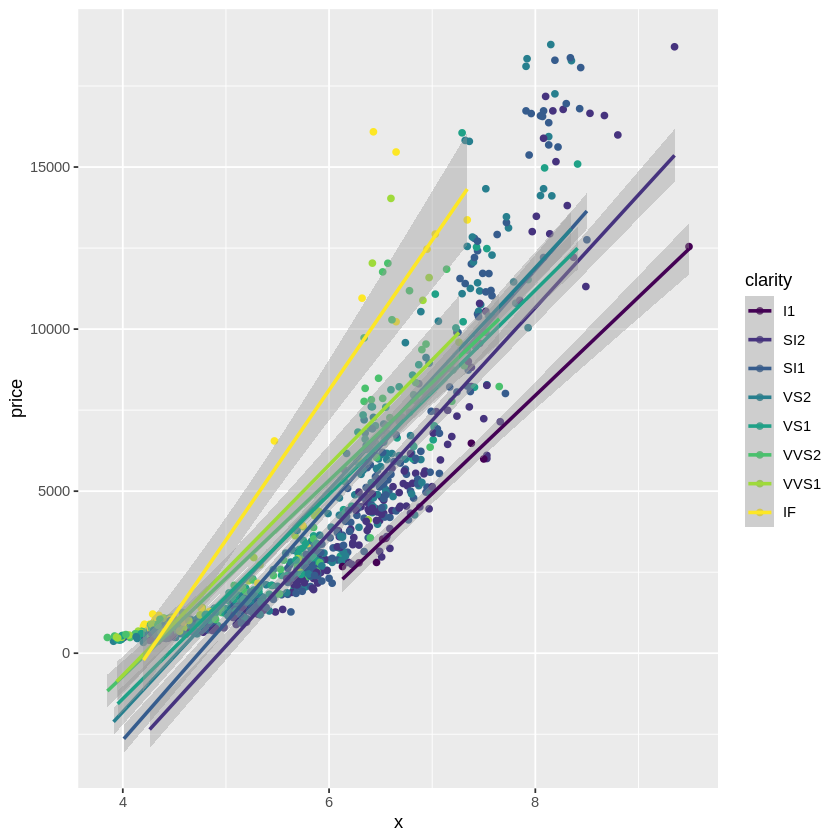

In [10]:
p5 = ggplot(dm, aes(x, price, color = clarity)) + 
    geom_point() + 
    geom_smooth(method = "lm")
p5

### Some other parameters

`geom_smooth()` using formula 'y ~ x'



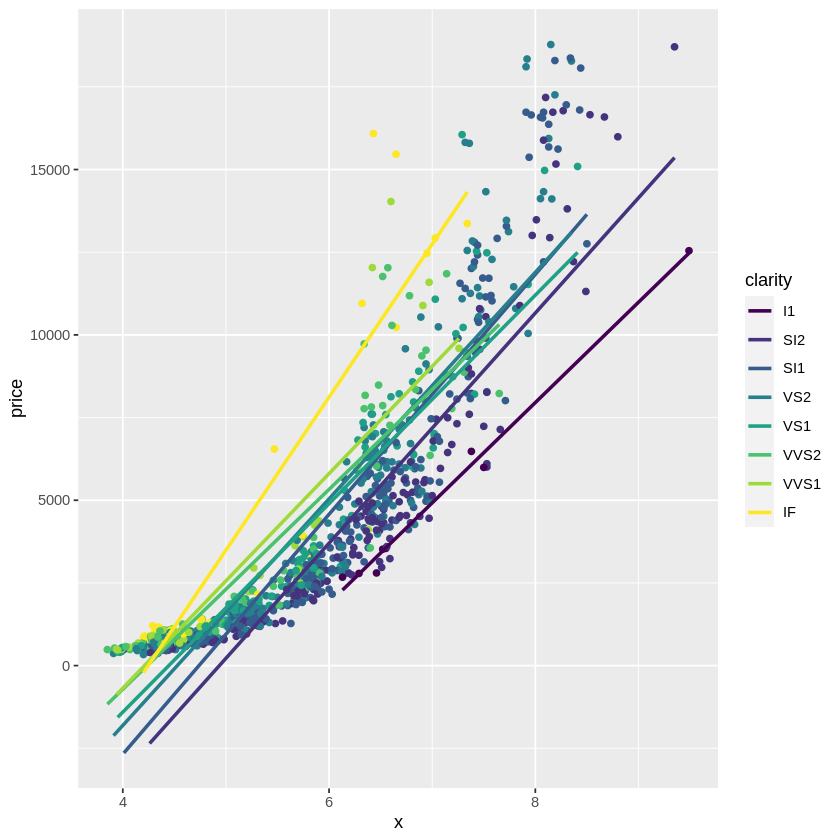

In [16]:
p6 = ggplot(dm, aes(x, price, color = clarity)) + 
    geom_point(show.legend=FALSE ) + 
    geom_smooth(method = "lm", se = F, show.legend=FALSE ) #+ theme(legend.position = "none")
p6

1. What does show.legend=FALSE do? 
    Avoid showing Legends
2. What does the se argument in geom_smooth do?
    Control whether to show confidence region of the fitted curve.

### Homework (You don't need to turn it in)
1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?
2. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predicions.


In [12]:
# Boxplot

# Histogram

# Area Chart

## Statistical transformations
Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, ?geom_bar shows that the default value for stat is 'count', which means that geom_bar() uses stat_count().

stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.

Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).


In [13]:
?geom_bar

In [14]:
popn <- tribble(
~city, ~population,
"Istanbul", 15029231,
"Moscow", 12615279,
"Saint Petersburg", 9126366,
"Berlin", 5383890,
"Madrid", 3748148
)

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph5.png)

In [15]:
ggplot(data = popn, aes(city, population)) + 
    geom_col() + ggtitle("Most Populated Cities in Europe")

ERROR: ignored

In [ ]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group  = 1))

Other times, you want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary() which summarises the y values for each unique x value, to draw attention to the summary that you're computing:

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph6.png)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


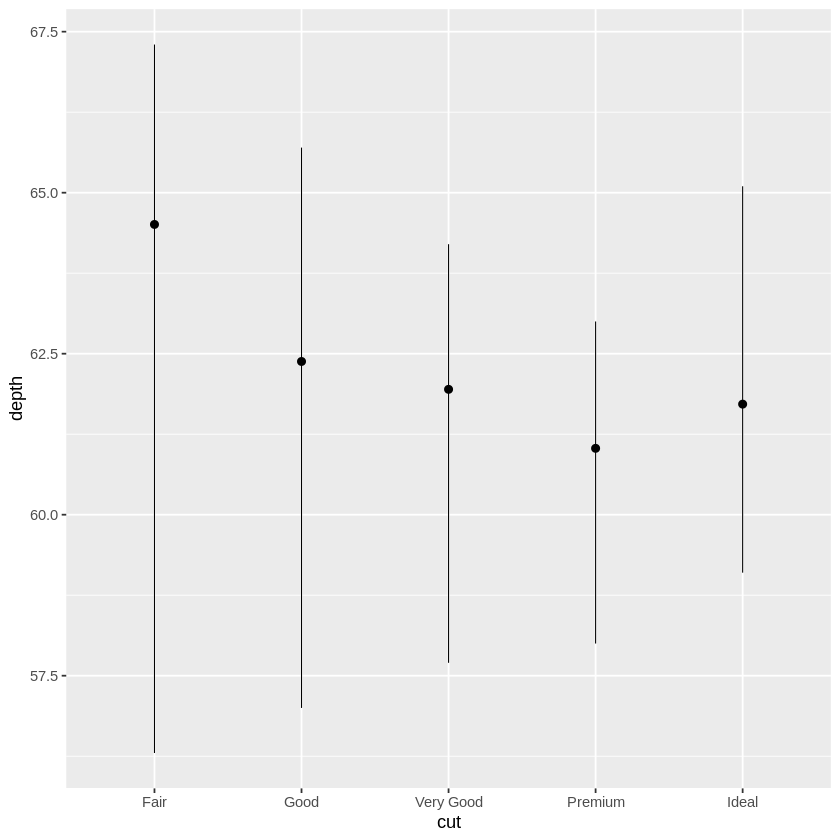

In [17]:
ggplot(data = dm, aes(cut, depth)) + 
    stat_summary(fun.y = mean, fun.ymin = min, fun.ymax = max, size = .3)

### Homework (You don't need to turn it in)
1. What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?
2. What does geom_col() do? How is it different to geom_bar()?
3. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
4. What variables does stat_smooth() compute? What parameters control its behaviour?
6. In our proportion bar chart, we need to set group = 1. Why?

## Position adjustments

In [ ]:
# Difference between color and fill
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph7.png)

In [ ]:
ggplot(data = dm, aes(x = cut)) + 
  geom_bar(aes(fill = clarity))

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

In [ ]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph10.png)

In [ ]:
ggplot(data = dm, aes(x = cut)) + 
  geom_bar(aes(fill = clarity))

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

In [ ]:
ggplot(data = dm) + 
  geom_point(mapping = aes(x = cut, y = price))

ggplot(data = dm) + 
  geom_point(mapping = aes(x = cut, y = price), position = "jitter")

### Homework (You don't need to turn it in)
1. What parameters to geom_jitter() control the amount of jittering?
2. Compare and contrast geom_jitter() with geom_count().
3. What's the default position adjustment from geom_boxplot()? Create a visualization of the mpg dataset and demostrate it. 
Make sure you go through coordinate systems.

# dplyr for data manipulation

In [ ]:
dim(dm)
head(dm)

Simply run 'dm' after declaring the dm variable above. can you guess what 'dbl', 'ord', and 'int' are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [ ]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

In [ ]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
levels(as.factor(sizes))

In [ ]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes)

There are five functions in dplyr: filter, arrange, select, mutate and summarise. all of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [ ]:
filter(dm, cut == 'Fair', color == 'J')

Usually you want to store the newly subsetted data in memory. 

In [ ]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [ ]:
4 == 6
test = 6
test
test == 5


## Use cases

In [ ]:
levels(dm$cut)[length(levels(dm$cut))]

In [ ]:
a = filter(dm, YCH) 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, YCH) 
# filtering for rows that satisfy both conditions

c = filter(dm, YCH) # look for XOR gate
# filtering for rows that satisfy exactly one condition

best_cuts = filter(dm, cut == levels(cut)[length(levels(cut))]) 
# filtering using membership condition

not_worst_cuts = filter(dm, YCH) 
# can do this because cut is an ordinal variable

In [ ]:
not_worst_cuts[1:20,]

In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [ ]:
x = 4
x == NA
is.na(x)

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [ ]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

In [ ]:
filter(df, x>1)

In [ ]:
filter(df, is.na(x) | x > 1)

### Homework (Don't need to turn it in)
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [ ]:
arrange(dm, clarity, color)[1:20,] 

Missing values are always sorted at the end:

In [ ]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

In [ ]:
arrange(df, desc(x))

### Exercise
1. Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [ ]:
names(dm)

In [ ]:
select(dm, carat, price)[1:20,]

In [ ]:
select(dm, carat:price)[1:20,]

In [ ]:
select(dm, -(carat:price))[1:20,]

Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [ ]:
rename(dm, width=x)[1:20,]

In [ ]:
select(dm, width = x)[1:20,]

Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [ ]:
select(dm, price, carat, everything())[1:20,]

There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise:
1. Write code that wil have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.

### Mutate
to create a computed column

In [ ]:
dm_dimensions = select(dm, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = x*y*z
)[1:20,]

If you only want to keep the new variables, use transmute()

In [ ]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:20,]

Read Section 5.5.1 in the book for some specific functions.

### Exercise
1. Add a new column that converts the US dollar prices to Korean Won amounts and rounds to the nearest integer. Then order the columns as [carat, WON price, price, ...] where '...' stands for everything else. Today's exchange rate is USD = 1070 WON

## Summarise

In [ ]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

In [ ]:
head(mpg)

In [ ]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans))) # regexp
head(mpg2)

In [ ]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary

In [ ]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

In [ ]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
    geom_point(mapping = aes(color = manufacturer, shape = year))

## Pipes
The transformations above can be written as:


In [ ]:
hwy_summary_ag2 = mpg2 %>% 
group_by(manufacturer, year) %>%
summarise(
    count = n(),
    hwy = mean(hwy, na.rm = TRUE),
    cty = mean(cty, na.rm = TRUE)) %>%
filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

In [ ]:
hwy_summary_ag2